In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bank_df=pd.read_csv('Bank Customer Churn Prediction.csv')

In [ ]:
bank_df.shape

(10000, 12)

In [ ]:
bank_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
bank_df.describe()


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#  Duplicated rows

In [ ]:
 sum(bank_df.duplicated())

0

# Missing values

In [86]:
bank_df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

# Is data balance?

Since the sample proportion in 2 classes are 80 % and 20% we consider the data as balanced data.

0    79.63
1    20.37
Name: churn, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'countplot of the churn')

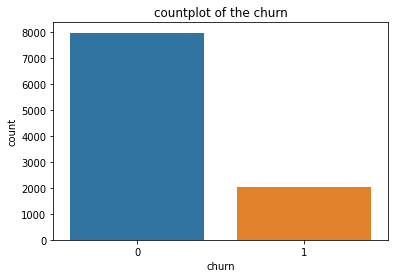

In [ ]:
print(bank_df['churn'].value_counts()/len(bank_df['churn'])*100)
sns.countplot(bank_df['churn'])
plt.title('countplot of the churn')

# distribution of numerical variables 

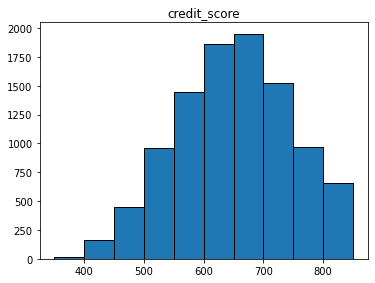

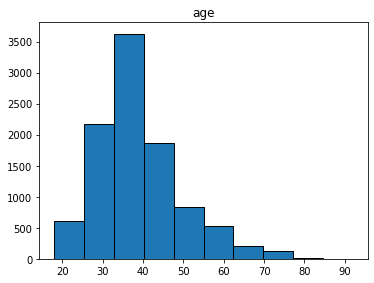

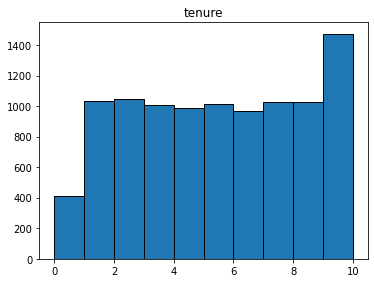

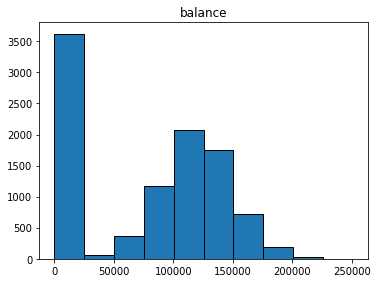

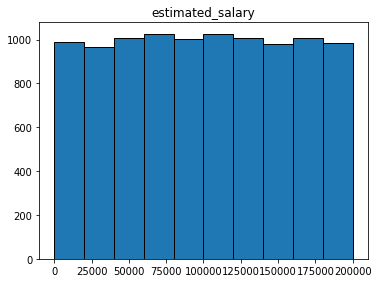

In [ ]:
 # Visualizing each numerical variables histogram
col=bank_df[['credit_score','age','tenure','balance','estimated_salary']]
 for i in col:
  n=1
  plt.figure(figsize=(20,20))
  plt.subplot(4,3,1)
  plt.hist(bank_df[i],edgecolor='black')
  plt.title(i)
  plt.show()
  n=n+1

# Unique values of categorical variables

In [ ]:
#number of unique values in country
print(bank_df['country'].value_counts())

#number of unique values in gender
print(bank_df['gender'].value_counts())

#number of unique values in active member
print(bank_df['active_member'].value_counts())

#number of unique values in credit card
print(bank_df['credit_card'].value_counts())

#number of unique values in products number
print(bank_df['products_number'].value_counts())

#number of unique values in churn
print(bank_df['churn'].value_counts())

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64
Male      5457
Female    4543
Name: gender, dtype: int64
1    5151
0    4849
Name: active_member, dtype: int64
1    7055
0    2945
Name: credit_card, dtype: int64
1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64
0    7963
1    2037
Name: churn, dtype: int64


# Visualizing the relationship of categorical and the response variable

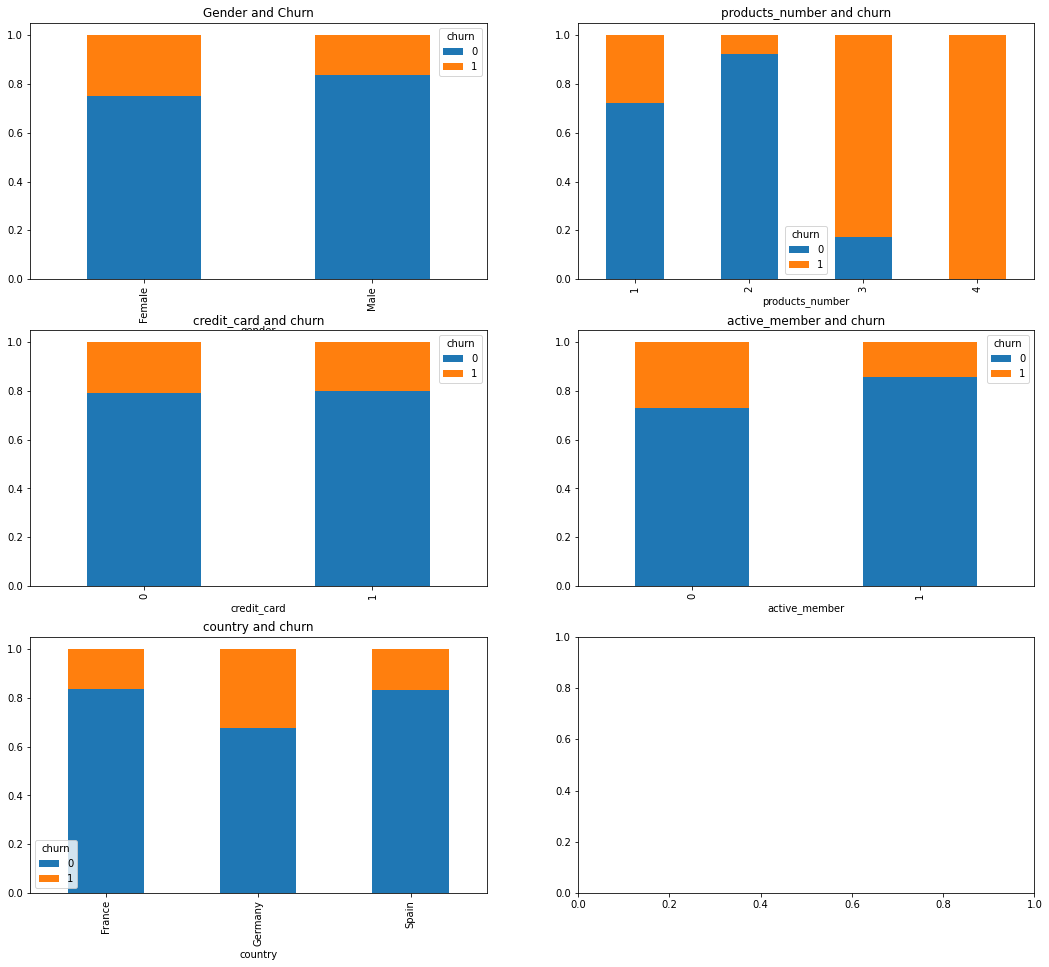

In [ ]:
crosstab_01=pd.crosstab(bank_df['gender'],bank_df['churn'])
crosstab_norm1=crosstab_01.div(crosstab_01.sum(1),axis=0)

crosstab_02=pd.crosstab(bank_df['products_number'],bank_df['churn'])
crosstab_norm2=crosstab_02.div(crosstab_02.sum(1),axis=0)

crosstab_03=pd.crosstab(bank_df['credit_card'],bank_df['churn'])
crosstab_norm3=crosstab_03.div(crosstab_03.sum(1),axis=0)

crosstab_04=pd.crosstab(bank_df['active_member'],bank_df['churn'])
crosstab_norm4=crosstab_04.div(crosstab_04.sum(1),axis=0)

crosstab_05=pd.crosstab(bank_df['country'],bank_df['churn'])
crosstab_norm5=crosstab_05.div(crosstab_05.sum(1),axis=0)

fig, axes = plt.subplots(3,2, figsize=(18,16)) 
crosstab_norm1.plot(kind='bar',stacked=True,title="Gender and Churn",ax=axes[0,0]) 
crosstab_norm2.plot(kind='bar',stacked=True,title="products_number and churn",ax=axes[0,1])
crosstab_norm3.plot(kind='bar',stacked=True,title="credit_card and churn",ax=axes[1,0])
crosstab_norm4.plot(kind='bar',stacked=True,title="active_member and churn",ax=axes[1,1])
crosstab_norm5.plot(kind='bar',stacked=True,title="country and churn",ax=axes[2,0])

# Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


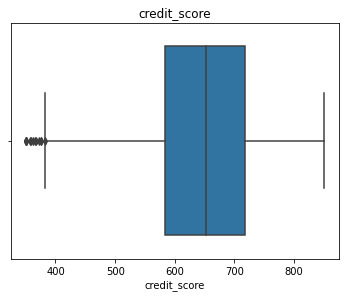

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


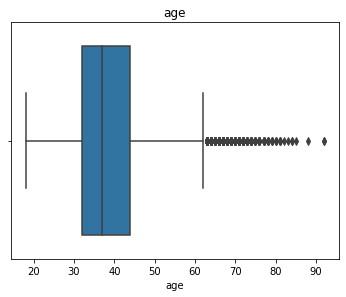

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


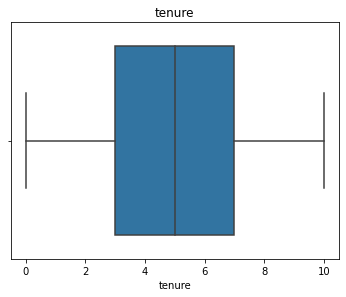

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


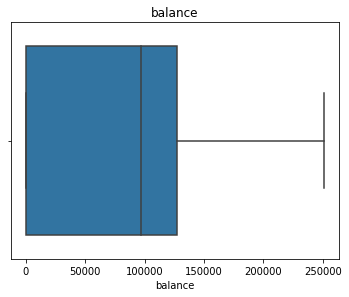

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


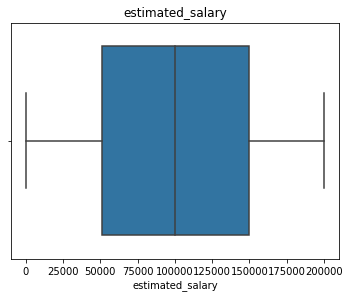

In [ ]:
col=bank_df[['credit_score','age','tenure','balance','estimated_salary']] 
for i in col:
  n=1
  plt.figure(figsize=(20,20))
  plt.subplot(4,3,1)
  sns.boxplot(bank_df[i])
  plt.title(i)
  plt.show()
  n=n+1

# Checking skewness

In [ ]:
bank_df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


customer_id         0.001149
credit_score       -0.071607
age                 1.011320
tenure              0.010991
balance            -0.141109
products_number     0.745568
credit_card        -0.901812
active_member      -0.060437
estimated_salary    0.002085
churn               1.471611
dtype: float64

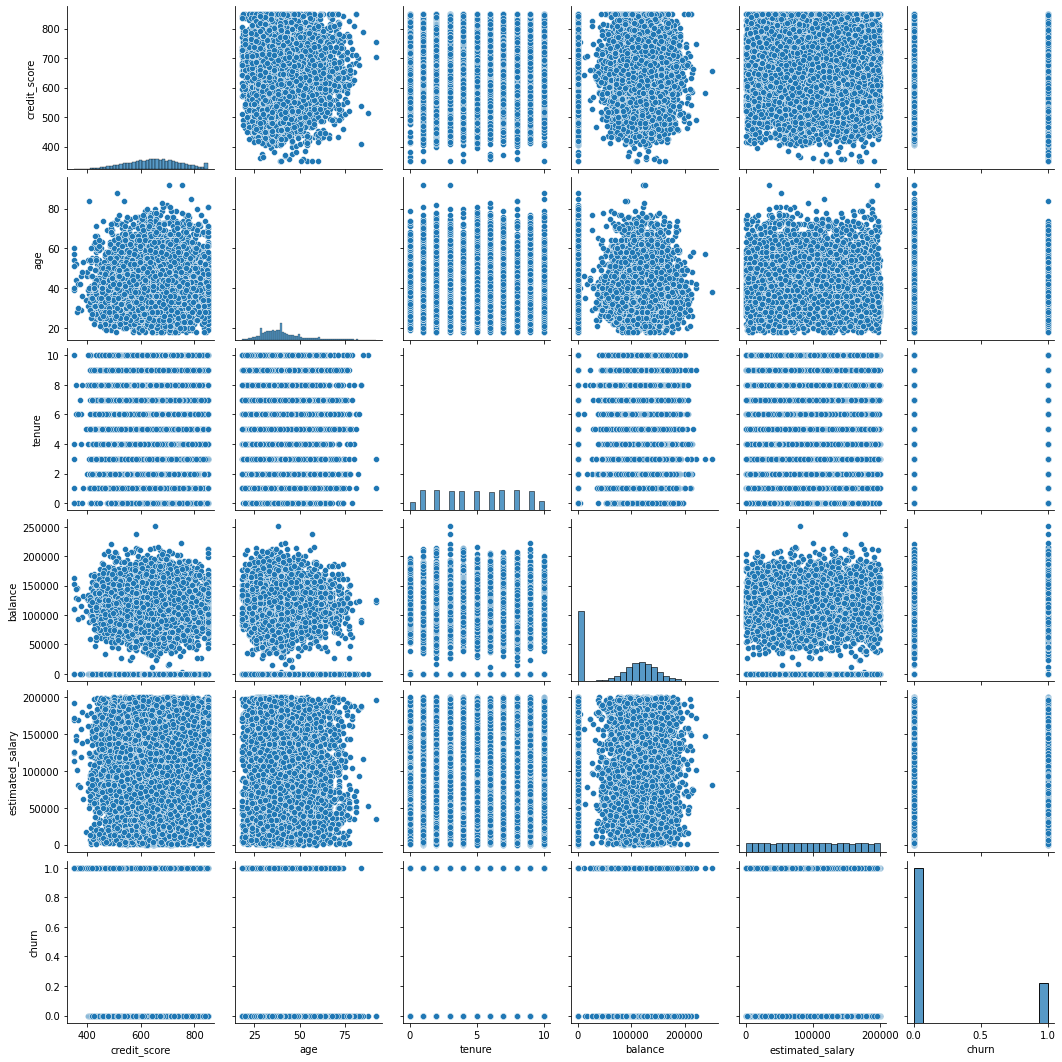

In [ ]:
df1=bank_df.drop(['customer_id','country','gender','products_number','credit_card','active_member'],axis=1)
sns.pairplot(df1)

# Correlation
There is no moderate or strong correlation whithin variables.

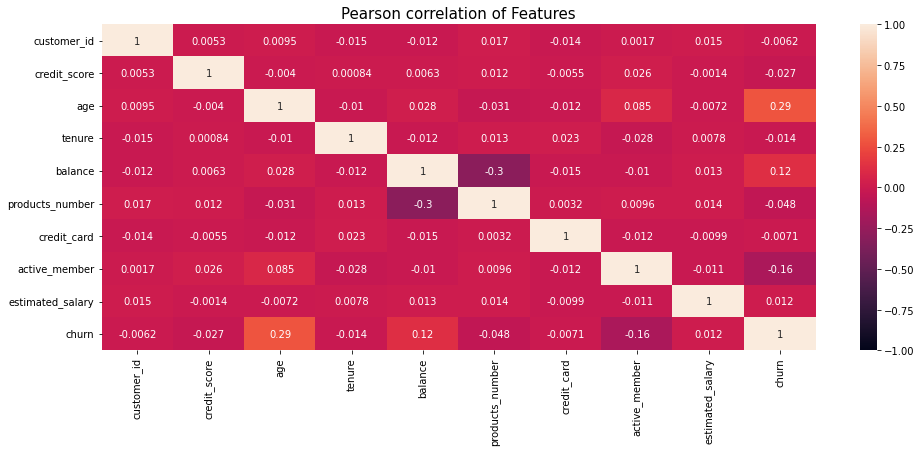

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(bank_df.corr(),vmin=-1, vmax=1, annot=True) 
plt.title("Pearson correlation of Features", y=1.05, size=15);